# Problem Statement
Use relevant machine learning model to predict whether person is diabetic or non diabetic

In [143]:
# import basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [144]:
# load the data
data=pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# outcome is target variable
# 1-diabetic
# 0-nondiabetic

# Basic checks

In [ ]:
# check no of rows and columns
data.shape

In [70]:
# print first 5 rows
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [71]:
# print last 5 rows
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [72]:
# print all the columns
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [73]:
# check data type of each column
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [74]:
# check memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [75]:
# find unique values in outcome
data.Outcome.unique()

array([1, 0], dtype=int64)

In [76]:
# find count of diabetic and non diabetic
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [77]:
# statistical analysis
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [78]:
# Check for missing values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Exploratory data Analysis

### Univariate
* hist plot is used to check distribution of data
* count plot is used to check whether data is balanced or not

<Axes: xlabel='Outcome', ylabel='count'>

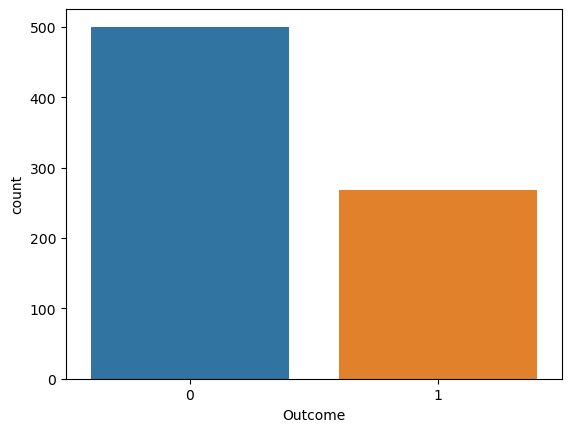

In [79]:
# check whether data is balanced or not
# data balanced: Equal number of records related to diabetic and non diabetic patients
sns.countplot(x=data.Outcome)

In [80]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [81]:
# check for distribution of data

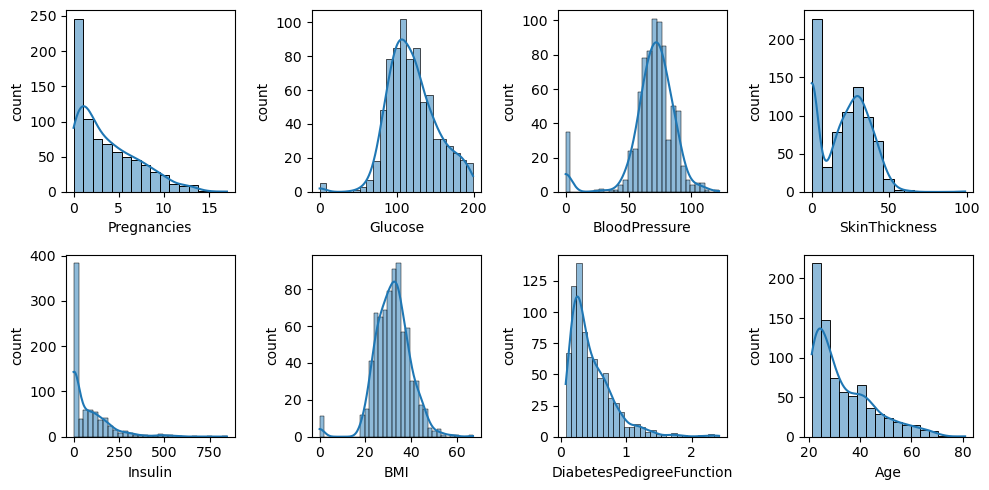

In [82]:
plt.figure(figsize=(10,5),facecolor='white')
plotnumber=1
for column in data.drop('Outcome',axis=1):
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.histplot(x=data[column],kde=True)
        plt.xlabel(column,fontsize=10)
        plt.ylabel("count",fontsize=10)
    plotnumber+=1
plt.tight_layout()

### Bivariate

<Axes: xlabel='Pregnancies', ylabel='count'>

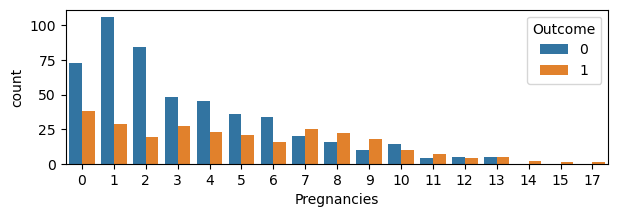

In [83]:






# Analyse how pregnancies will impact diabetes
plt.figure(figsize=(7,2))
sns.countplot(data=data,x='Pregnancies',hue='Outcome')

<Axes: xlabel='Glucose', ylabel='Count'>

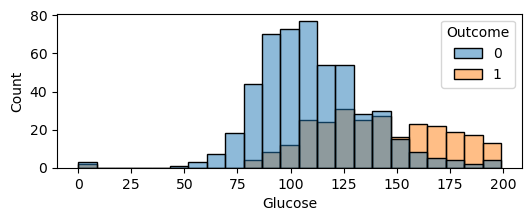

In [84]:
# Analyse relationship between glucose and diabetic
plt.figure(figsize=(6,2))
sns.histplot(data=data,x='Glucose',hue='Outcome')

<Axes: xlabel='BloodPressure', ylabel='Count'>

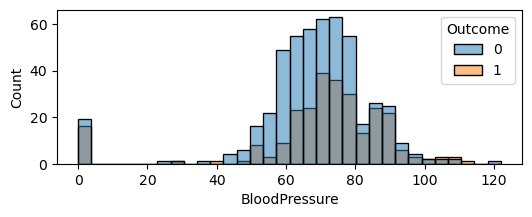

In [85]:
# Analyse relationship between Bloodpressure and diabetes
plt.figure(figsize=(6,2))
sns.histplot(data=data,x='BloodPressure',hue='Outcome')

<Axes: xlabel='Insulin', ylabel='Count'>

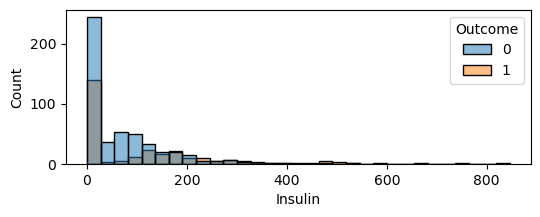

In [86]:
# Analyse relationahip between Insulin and diabetic
plt.figure(figsize=(6,2))
sns.histplot(data=data,x='Insulin',hue='Outcome')

In [87]:
# The chance of being diabetic is less if Insulin level is less.
# The chance of being diabetic is high if insulin level is high.

<Axes: xlabel='Age', ylabel='Count'>

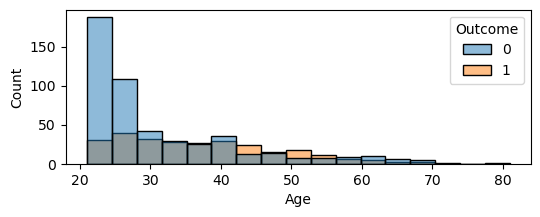

In [88]:
# Analyse Age with diabetic
plt.figure(figsize=(6,2))
sns.histplot(data=data,x='Age',hue='Outcome')

<Axes: xlabel='BMI', ylabel='Count'>

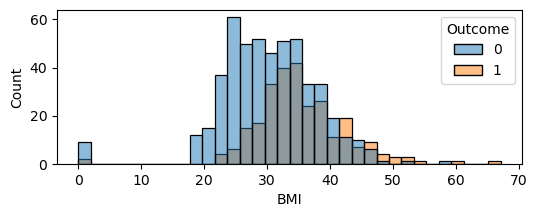

In [89]:
plt.figure(figsize=(6,2))
sns.histplot(data=data,x='BMI',hue='Outcome')

<Axes: xlabel='Glucose', ylabel='BloodPressure'>

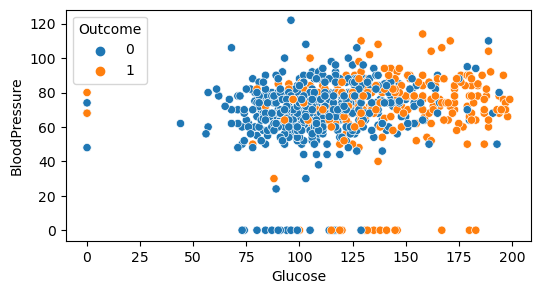

In [90]:
# Analyse Glucose with Bloodpressure
plt.figure(figsize=(6,3))
sns.scatterplot(data=data,x='Glucose',y='BloodPressure',hue='Outcome')

<Axes: xlabel='Insulin', ylabel='BloodPressure'>

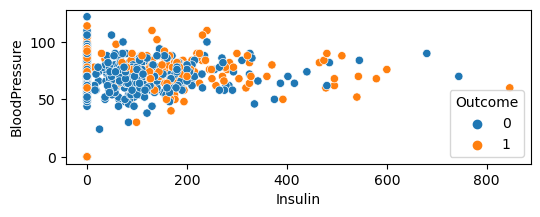

In [91]:
# Analyse Insulin and Bloodpressure
plt.figure(figsize=(6,2))
sns.scatterplot(data=data,x='Insulin',y='BloodPressure',hue='Outcome')

### Multivariate

In [ ]:
sns.pairplot(data,hue='Outcome')

# Data Preprocessing

In [ ]:
# check for missing values and handle them
data.isnull().sum()

In [ ]:
# Numerical: mean(when data is normal)or median(when data is not normal/skewed)
# categorical: mode

In [ ]:
# Check for duplicates
data.duplicated().sum()

In [ ]:
data['Glucose'].replace(0,data['Glucose'].median(),inplace=True)

In [ ]:
data['BloodPressure'].replace(0,data['BloodPressure'].median(),inplace=True)

In [ ]:
data['Insulin'].replace(0,data['Insulin'].median(),inplace=True)

In [ ]:
data['BMI'].replace(0,data['BMI'].median(),inplace=True)

In [ ]:
data['SkinThickness'].replace(0,data['SkinThickness'].median(),inplace=True)

In [ ]:
data.describe().T

# check for outliers

In [ ]:
plt.figure(figsize=(10,5),facecolor='white')
plotnumber=1
for column in data.drop('Outcome',axis=1):
    if plotnumber<9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(x=data[column])
        plt.xlabel(column,fontsize=10)
        plt.ylabel("count",fontsize=10)
    plotnumber+=1
plt.tight_layout()

###  Scaling data [ Normalization or standardization]

In [ ]:
# Min max scaler
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
data.iloc[:,:-1]=scaling.fit_transform(data.iloc[:,:-1])


In [ ]:
data

In [ ]:
data.iloc[:,:-1]

In [ ]:
# Skipping converting categorical data into numerical

# Feature Engineering

In [ ]:
# check for multicollinearity
data.corr()

In [ ]:
plt.figure(figsize=(7,3))
sns.heatmap(data.drop('Outcome',axis=1).corr(),annot=True)

# Model Building

In [ ]:
# split data into x and y
x=data.drop('Outcome',axis=1)
y=data[['Outcome']]

In [ ]:
# Split data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=2)

In [ ]:
x_train.shape

In [47]:
x_test.shape

(231, 8)

In [48]:
data.shape

(768, 9)

# Apply Logistic regression

In [49]:
# import Logistic regression model
from sklearn.linear_model import LogisticRegression
# initialize the model
model=LogisticRegression()
# train model with x_train,y_train
model.fit(x_train,y_train)

LogisticRegression()

In [50]:
# make predictions using x_test
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [51]:
df=y_test.copy()

In [52]:
df['y_pred']=y_pred

In [53]:
df

,Outcome,y_pred
158,0,0
251,0,0
631,0,0
757,1,0
689,1,1
...,...,...
225,0,0
387,1,0
120,1,1
7,0,0


# Evaluate the model

In [54]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report

In [55]:
confusion_matrix(y_test,y_pred)

array([[139,  16],
       [ 41,  35]], dtype=int64)

In [56]:
accuracy_score(y_test,y_pred)

0.7532467532467533

In [57]:
precision_score(y_test,y_pred)

0.6862745098039216

In [58]:
recall_score(y_test,y_pred)

0.4605263157894737

In [59]:
f1_score(y_test,y_pred)

0.5511811023622046

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       155
           1       0.69      0.46      0.55        76

    accuracy                           0.75       231
   macro avg       0.73      0.68      0.69       231
weighted avg       0.74      0.75      0.74       231



In [61]:
# Model is 52% better model in predicting diabetic patients as diabetic.

In [149]:
# ROC-AUC Method
from sklearn.metrics import roc_curve,auc
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_pred)
roc_auc_score=auc(false_positive_rate,true_positive_rate)
print(roc_auc_score)

0.6786502546689304


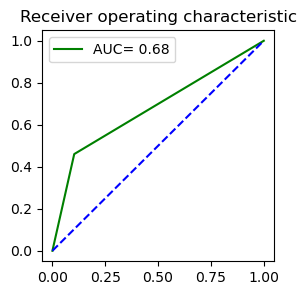

In [146]:
plt.figure(figsize=(3,3))
import matplotlib.pyplot as plt
plt.title('Receiver operating characteristic')
plt.plot(false_positive_rate,true_positive_rate,'g',label='AUC= %0.2f' % roc_auc_score)
plt.legend(loc='upper left')
plt.plot([0,1],[0,1],'b--')